In [13]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [14]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [15]:
# Training Data
'''
TRAINING DATA
5400 - ones
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 1][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []

x_digit = x_full[y_full == 0][:600]
y_digit = np.zeros((600,))  
x_train_others.append(x_digit)
y_train_others.append(y_digit)

for digit in range(2,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [16]:
# Testing Data
'''
TESTING DATA
810 - ones
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 1][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
x_digit = x_test_full[y_test_full == 0][:90]
y_digit = np.zeros((90,))  
x_test_others.append(x_digit)
y_test_others.append(y_digit)
for digit in range(2,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [17]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,306 (75.41 KB)

 Trainable params: 19,306 (75.41 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
x=model.get_weights()[16]
print((x))

[[ 1.1226629]
 [-0.0838362]]


In [19]:
history = model.fit(
    x_train, y_train,
    epochs=10
)

Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6981 - loss: 0.9711
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.2614
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9822 - loss: 0.1502
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9857 - loss: 0.0893
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0564
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9922 - loss: 0.0407
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0456
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9968 - loss: 0.0203
Epoch 9/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0225
Epoch 10/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0198


In [20]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 0.8496
Epoch 2: Accuracy = 0.9789
Epoch 3: Accuracy = 0.9831
Epoch 4: Accuracy = 0.9875
Epoch 5: Accuracy = 0.9893
Epoch 6: Accuracy = 0.9913
Epoch 7: Accuracy = 0.9910
Epoch 8: Accuracy = 0.9951
Epoch 9: Accuracy = 0.9952
Epoch 10: Accuracy = 0.9955


In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0301 
Test accuracy: 0.9925925731658936


In [30]:
kernel=model.layers[0].get_weights()
kernel=(kernel[0])

In [31]:
image = x_train[0]
image.shape

(28, 28)

TypeError: Invalid shape (3, 3, 30, 30) for image data

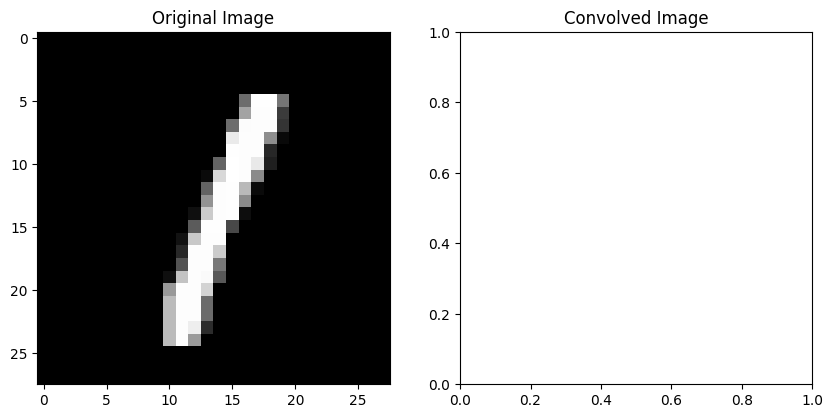

In [35]:
import numpy as np
from scipy.fft import fft2, ifft2
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt

def convolve_fft(image, kernel):
    # Ensure the kernel is a 2D array (this is important if kernel is 1D)
    if kernel.ndim == 1:
        kernel = kernel[:, np.newaxis]  # Reshape kernel if it's 1D
    
    # Get the shapes of the image and the kernel
    image_shape = image.shape
    kernel_shape = kernel.shape
    
    # Calculate the size for the FFT (we pad the image and kernel to avoid circular convolution)
    size = (image_shape[0] + kernel_shape[0] - 1, image_shape[1] + kernel_shape[1] - 1)
    
    # Perform FFT on both the image and the kernel
    fft_image = fft2(image, size)
    fft_kernel = fft2(kernel, size)
    
    # Perform element-wise multiplication in the frequency domain
    fft_product = fft_image * fft_kernel
    
    # Perform inverse FFT to get the convolution result
    convolved = np.real(ifft2(fft_product))
    
    # Crop the convolution result to the original image size (valid convolution)
    cropped_result = convolved[:image_shape[0], :image_shape[1]]
    
    return cropped_result



# Convolve using FFT
result = convolve_fft(image, kernel)
# Assuming the result is a 4D or 3D array, we'll squeeze it to make it 2D
result = np.squeeze(result)

# Convolve using FFT and plot the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(result, cmap='gray')  # Ensure the result is 2D
plt.show()



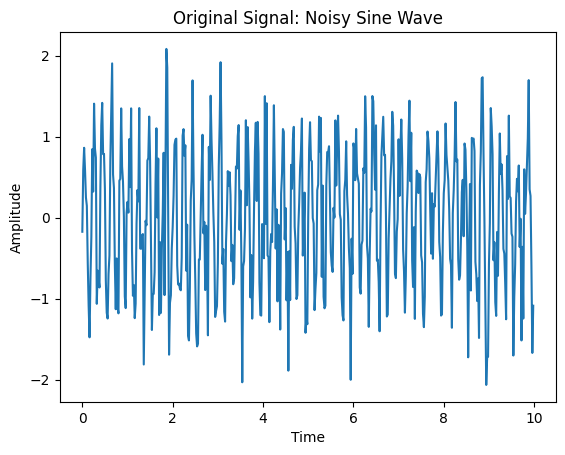

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Sample parameters
N = 500  # Number of samples
T = 1.0 / 50.0  # Sample spacing (sampling rate)
x = np.linspace(0.0, N*T, N, endpoint=False)  # Time vector
freq = 5  # Frequency of the sine wave

# Create a noisy sine wave
signal = np.sin(2 * np.pi * freq * x) + 0.5 * np.random.normal(size=x.shape)

# Plot the original signal
plt.plot(x, signal)
plt.title("Original Signal: Noisy Sine Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


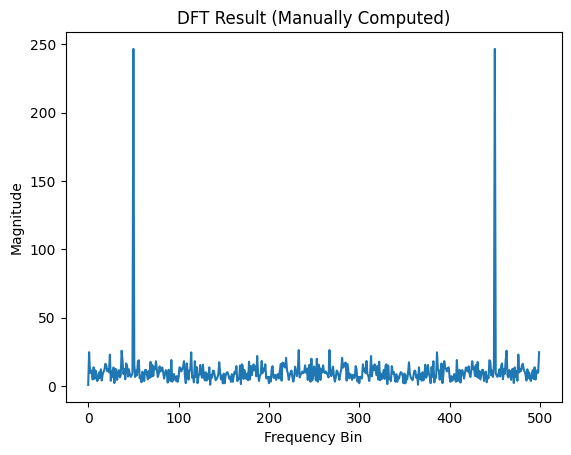

In [37]:
# Compute DFT manually (for demonstration purposes, not efficient)
def DFT(signal):
    N = len(signal)
    dft_result = []
    for k in range(N):
        summation = 0
        for n in range(N):
            summation += signal[n] * np.exp(-2j * np.pi * k * n / N)
        dft_result.append(summation)
    return np.array(dft_result)

# Apply DFT
dft_result = DFT(signal)

# Plot the DFT result (magnitude)
plt.plot(np.abs(dft_result))
plt.title("DFT Result (Manually Computed)")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.show()


[25.        -0.j         -7.79085937-2.83564091j  0.21688142+0.18198512j
 -0.5       -0.8660254j   0.07397795+0.41954982j  0.07397795-0.41954982j
 -0.5       +0.8660254j   0.21688142-0.18198512j -7.79085937+2.83564091j]


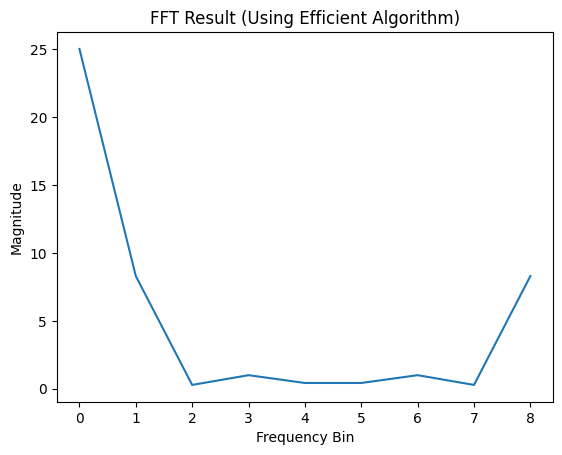

In [40]:
# Apply FFT using the built-in function (much faster)

signal=[1,2,3,4,5,4,3,2,1]
fft_result = fft(signal)
print(fft_result)

# Plot the FFT result (magnitude)
plt.plot(np.abs(fft_result))
plt.title("FFT Result (Using Efficient Algorithm)")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")
plt.show()
